In [1]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

import matplotlib.ticker as ticker # 시각화(그래프 축 눈금 간격 설정)
import matplotlib.dates as mdates # 시각화 (날짜포맷팅)

import warnings
warnings.filterwarnings('ignore')


In [3]:
%%time 
df = pd.read_csv('mlb.csv')
df_base = df.copy() # raw 파일 copy해서 사용하는 것 추천

CPU times: total: 2.33 s
Wall time: 2.37 s


from google.colab import drive
drive.mount('/content/drive')

- csv파일 경로 지정( 만약, 좌상단의 구글드라이브 연결 버튼 클릭할 때 코드가 자동 완성된 셀이 나온다면 반드시 실행 )

In [4]:
# 데이터 정보 확인 (info, describe, head, tail)

In [5]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761618 entries, 0 to 761617
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   gameId                761618 non-null  object
 1   seasonType            761618 non-null  object
 2   year                  761618 non-null  int64 
 3   startTime             761618 non-null  object
 4   attendance            761618 non-null  int64 
 5   duration              761618 non-null  object
 6   awayTeamName          761618 non-null  object
 7   homeTeamName          761618 non-null  object
 8   venueName             761618 non-null  object
 9   venueSurface          761618 non-null  object
 10  venueCapacity         761618 non-null  int64 
 11  inningNumber          761618 non-null  int64 
 12  inningHalf            761618 non-null  object
 13  pitchSpeed            761618 non-null  int64 
 14  outcomeDescription    733839 non-null  object
 15  hitterId         

In [6]:
df_base.describe() #숫자로 구성된 변수만 표시됨

,year,attendance,venueCapacity,inningNumber,pitchSpeed,hitterWeight,hitterHeight,is_ab,is_ab_over,is_hit,is_on_base,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball
count,761618.0,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000
mean,2016.0,30154.393977,42957.315234,5.091765,82.816152,199.713903,70.415032,0.218077,0.243069,0.055773,0.072211,0.006551,0.005159,0.005803,0.000011,0.002390,0.000490
std,0.0,9774.041646,5173.463121,2.684819,21.824114,44.012705,13.870694,0.412940,0.428937,0.229484,0.258837,0.080670,0.071639,0.075959,0.003241,0.048826,0.022125
min,2016.0,8766.000000,12500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,22274.000000,39021.000000,3.000000,83.000000,190.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,30293.000000,42060.000000,5.000000,89.000000,205.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,38044.000000,47476.000000,7.000000,93.000000,220.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,53621.000000,56000.000000,19.000000,105.000000,305.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_base.head()

,gameId,seasonType,year,startTime,attendance,duration,awayTeamName,homeTeamName,venueName,venueSurface,venueCapacity,inningNumber,inningHalf,pitchSpeed,outcomeDescription,hitterId,hitterWeight,hitterHeight,hitterBatHand,pitcherId,pitcherThrowHand,pitchType,pitchTypeDescription,is_ab,is_ab_over,is_hit,is_on_base,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0,0,0,0,0,0,0,0,0,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1,1,1,1,0,0,0,0,0,0
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0,0,0,0,0,0,0,0,0,0


-----

* 참고: (두 개의 단어 이상) 변수 표기 방식
    - 파스칼( PascalCase ): 함수 혹은 클래스 이름에 주로 적용
    - 카멜( camelCase ): 변수 혹은 컬럼에 주로 적용
    - 스네이크( snake_case ): 변수 혹은 컬럼에 주로 적용
cf) 분석가로서는 카멜 혹은 스네이크 방식 많이 사용(회사마다 컨벤션이 다름)

- 컬럼명 카멜 -> 스네이크방식으로 변경

In [8]:
df_base.rename(
    columns = {
        'gameId': 'game_id',
        'seasonType': 'season_type',
        'startTime': 'start_time',
        'awayTeamName': 'away_team_name',
        'homeTeamName': 'home_team_name',
        'venueName': 'venue_name',
        'venueSurface': 'venue_surface',
        'venueCapacity': 'venue_capacity',
        'inningNumber': 'inning_number',
        'inningHalf': 'inning_half',
        'pitchSpeed': 'pitch_speed',
        'outcomeDescription': 'outcome_description',
        'hitterId': 'hitter_id',
        'hitterWeight': 'hitter_weight',
        'hitterHeight': 'hitter_height',
        'hitterBatHand': 'hitter_bat_hand',
        'pitcherId': 'pitcher_id',
        'pitcherThrowHand': 'pitcher_throw_hand',
        'pitchType': 'pitch_type',
        'pitchTypeDescription': 'pitch_type_description',
    },
    inplace = True
)
## inplace = True (덮어쓰고 저장됨)
## if) 덮어쓰고 싶지 않다면, inplace= True 지우고, 맨위에 df.base = df_base.rename 으로 새롭게 선언해주기!

In [9]:
df_base.head()

,game_id,season_type,year,start_time,attendance,duration,away_team_name,home_team_name,venue_name,venue_surface,venue_capacity,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_ab,is_ab_over,is_hit,is_on_base,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0,0,0,0,0,0,0,0,0,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1,1,1,1,0,0,0,0,0,0
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0,0,0,0,0,0,0,0,0,0


In [10]:
#df_base.columns : 컬럼만 나옴
df_base.columns.tolist() #데이터 리스트화하여 확인 : tolist
sorted(df_base.columns.tolist()) # 오름차순으로 정렬
# sorted(df_base.columns.tolist(), reverse =True) # 내림차순으로 정렬

['attendance',
 'away_team_name',
 'duration',
 'game_id',
 'hitter_bat_hand',
 'hitter_height',
 'hitter_id',
 'hitter_weight',
 'home_team_name',
 'inning_half',
 'inning_number',
 'is_ab',
 'is_ab_over',
 'is_bunt',
 'is_bunt_shown',
 'is_double_play',
 'is_hit',
 'is_on_base',
 'is_passed_ball',
 'is_triple_play',
 'is_wild_pitch',
 'outcome_description',
 'pitch_speed',
 'pitch_type',
 'pitch_type_description',
 'pitcher_id',
 'pitcher_throw_hand',
 'season_type',
 'start_time',
 'venue_capacity',
 'venue_name',
 'venue_surface',
 'year']

# data 확인

### distinct value 확인 with unique

In [11]:
# 시즌확인(2016년이 맞는지)
df_base['year'].unique().tolist()
#df_base['year'].unique()

[2016]

In [12]:
# 경기 종류(정규시즌)
df_base['season_type'].unique().tolist() 
# df_base.season_type.unique().todolist() 

## 같은 결과(객체로 접근) but, 예약어는 변수로 선언하면 안됨 (ex. class 등)
## 따라서, 첫번째 방식으로 사용하는 것 추천!

['REG']

In [13]:
# 경기장
# df_base['venue_name'].unique().tolist()
sorted(df_base['venue_name'].unique().tolist())

['AT&T Park',
 'Angel Stadium of Anaheim',
 'Busch Stadium',
 'Chase Field',
 'Citi Field',
 'Citizens Bank Park',
 'Comerica Park',
 'Coors Field',
 'Dodger Stadium',
 'Fenway Park',
 'Fort Bragg',
 'Globe Life Park in Arlington',
 'Great American Ball Park',
 'Kauffman Stadium',
 'Marlins Park',
 'Miller Park',
 'Minute Maid Park',
 'Nationals Park',
 'Oakland Coliseum',
 'Oriole Park at Camden Yards',
 'PETCO Park',
 'PNC Park',
 'Progressive Field',
 'Rogers Centre',
 'Safeco Field',
 'Target Field',
 'Tropicana Field',
 'Turner Field',
 'U.S. Cellular Field',
 'Wrigley Field',
 'Yankee Stadium']

In [14]:
# 타석 결과
df_base['outcome_description'].unique().tolist()

['Foul Ball',
 'Double',
 'Single',
 'Triple',
 'Strike Swinging',
 'SEE RUNNER(S) OUTCOME',
 'Homerun',
 'Ball',
 'Dirt Ball',
 'Strike Looking',
 nan,
 'Fly Out',
 'Ground Out',
 'Foul Tip',
 'Line Out',
 'Fielders Choice',
 'Pop Out',
 'Reached on error',
 'Single - Out at 2nd',
 'Sacrifice Bunt',
 'Intentional Ball',
 'Sacrifice Fly',
 'Single-Adv-2nd',
 'Hit by pitch',
 'Sacrifice Bunt-Adv-1st',
 ' Strike Swinging - Out at Home',
 'Pitch Out',
 "Fielder's Choice-Adv-2nd",
 'Double Out at 3rd',
 'Reached on error-Adv-2nd',
 'Reached on error-Adv-3rd',
 'Single-Adv-3rd',
 'Balk',
 'Strike-swinging-Adv-1st',
 'Double-Adv-3rd',
 'Catcher Interference',
 'Fielders Choice - Out at 2nd',
 'Sacrifice Fly-Adv-1st',
 'Triple - Out at Home',
 'Single-Adv-Home',
 'Reached On Error - Out at 2nd',
 'Double-Adv-Home',
 'Sacrifice Bunt-Adv-2nd',
 'Triple-Adv-Home',
 'Strike Looking - Out at 1st',
 'Sacrifice Fly-Adv-2nd',
 'Single - Out at 3rd',
 'Strike-looking-Adv-1st']

In [15]:
# 타자 주 사용 손
df_base['hitter_bat_hand'].unique().tolist()

['R', 'L', 'B', nan]

In [16]:
# 투수 주 사용 손
df_base['pitcher_throw_hand'].unique().tolist()

['R', 'L', nan, 'B']

In [17]:
# 투구(구종) 타입
df_base['pitch_type'].unique().tolist()

['SL', 'SI', 'CT', nan, 'FA', 'CU', 'CH', 'KN', 'SP', 'IB', 'PI', 'SC', 'FO']

cf) unique() 메소드로 접근하면 효용이 떨어지는 변수도 있음 : ProductID, CustomerID 등 고유값(PK값)들은 크게 확인할 필요 없음

## 1-1. 야구경기

In [18]:
# 필요한, 적당한 컬럼 선정하여 가져오기
df_game_semi = df_base[['game_id','season_type','year','start_time','attendance','duration','inning_number','away_team_name','home_team_name','venue_name','venue_surface','venue_capacity']]
df_game_semi

,game_id,season_type,year,start_time,attendance,duration,inning_number,away_team_name,home_team_name,venue_name,venue_surface,venue_capacity
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,3,Mets,Braves,Turner Field,grass,49586
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,6,Mets,Braves,Turner Field,grass,49586
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,7,Mets,Braves,Turner Field,grass,49586
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,7,Mets,Braves,Turner Field,grass,49586


## 데이터 집계  : 각 game 을 설명하는 데이터 구성
- game_id를 기준으로, 각 중복된 값을 제외하고 고유의 값을 가져오기: max 활용
- 어느 경기장에서 경기가 언제 시작했는 지, 관중들은 몇 명인 지, 경기 시간은 어떻게 되는 지 등
- df_game_semi의 groupby 결과(우변)를, 새로운 df( df_game )로 선언

In [19]:
df_game = df_game_semi.groupby(['game_id']).agg(
                                            start_at = ('start_time', 'max'),
                                            attendance = ('attendance', 'max'),
                                            capacity = ('venue_capacity', 'max'),
                                            ground_name = ('venue_name', 'max'),
                                            duration = ('duration', 'max'),
                                            inning = ('inning_number', 'max'),
                                            home_team = ('home_team_name', 'max')
                                        ).reset_index()
df_game

# agg(aggregation)함수 : 어떻게 집계할 것인지
# df_game = df_game_semi.groupby(['groupby 를 하는 기준']).agg( 어떠한 방식으로 집계?
#    start_at = ('star_time', 'max'),
#    colum_2 = ('다른컬럼', '집계방식 -> max, count, unuique(고유값), sum , lambda))


,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins
...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins


In [20]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      2428 non-null   object
 1   start_at     2428 non-null   object
 2   attendance   2428 non-null   int64 
 3   capacity     2428 non-null   int64 
 4   ground_name  2428 non-null   object
 5   duration     2428 non-null   object
 6   inning       2428 non-null   int64 
 7   home_team    2428 non-null   object
dtypes: int64(3), object(5)
memory usage: 151.9+ KB


## 데이터 집계 : 각 경기장기준으로 치른 경기 수 확인

In [21]:
df_game.groupby(['ground_name']).agg(game_cnts = ('game_id', 'nunique')).reset_index()

#동일결과 : df_game.groupby(['ground_name']).agg(game_cnts = ('game_id', 'count')). reset_index()

#reset_index하는 이유 : ground_name 를 index 역할에서 -> 컬럼 역할하게 하기 위해서 !
#df_game.groupby(['ground_name']).agg(game_cnts = ('game_id', 'nunique')).reset_index().info()


##→ MLB는 정규 리그 1 시즌 1 팀 162경기

,ground_name,game_cnts
0,AT&T Park,81
1,Angel Stadium of Anaheim,81
2,Busch Stadium,81
3,Chase Field,81
4,Citi Field,81
5,Citizens Bank Park,81
6,Comerica Park,80
7,Coors Field,81
8,Dodger Stadium,81
9,Fenway Park,81


## 컬럼 생성: date

In [23]:
# 각 컬럼들의 타입을 확인
# 날짜처럼 보이는 start_at의 데이터 형태를 확인 해 보기
# string = object
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   game_id      2428 non-null   object        
 1   start_at     2428 non-null   object        
 2   attendance   2428 non-null   int64         
 3   capacity     2428 non-null   int64         
 4   ground_name  2428 non-null   object        
 5   duration     2428 non-null   object        
 6   inning       2428 non-null   int64         
 7   home_team    2428 non-null   object        
 8   start_date   2428 non-null   datetime64[ns]
 9   start_month  2428 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 189.8+ KB


In [24]:
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7


- 날짜 데이터 생성 해 주기:
날짜처럼 보이지만 실제로 문자열( object )인 start_at 컬럼을 슬라이스 해 준다.

In [27]:
#날짜만 슬라이스
df_game['start_date'] = df_game['start_at'].str.slice(start = 0, stop = 10) 

#data type 을 문자 type으로 변환  -> datetime(숫자)로 변경 & 형식은 yyyy-mm-dd
df_game['start_date'] = pd.to_datetime(df_game['start_date'], format = '%Y-%m-%d')

df_game['start_month'] = df_game['start_date'].dt.month
df_game['start_day'] = df_game['start_date'].dt.dayofweek 

# 형식이 datetime인 경우,  day, dayofweek(요일), week , month 등  날짜 추출 가능 
# dayofweek(0~6  or 1~7 로 표시됨: 위에는 2016/8/24가 수요일이고, 2이기떄문에, 0부터 월요일 시작함을 유추 )

df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5
...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,3
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,6
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,5
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,3


In [28]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   game_id      2428 non-null   object        
 1   start_at     2428 non-null   object        
 2   attendance   2428 non-null   int64         
 3   capacity     2428 non-null   int64         
 4   ground_name  2428 non-null   object        
 5   duration     2428 non-null   object        
 6   inning       2428 non-null   int64         
 7   home_team    2428 non-null   object        
 8   start_date   2428 non-null   datetime64[ns]
 9   start_month  2428 non-null   int64         
 10  start_day    2428 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 208.8+ KB


## 시각화 (그래프 그리기): 파이차트 외 대부분 그래프 커버 가능!
1. fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8)) \
2-1) sns.countplot( data = df_game, x = 'start_month')
    \
2-2) sns.distplot(
    df_game['occupied_ratio'],kde = False,  bins = 30, hist = True )
    \
2-3) sns.lineplot( data = temp_df, x = 'start_date', y = 'occupied_ratio',marker = 'o')

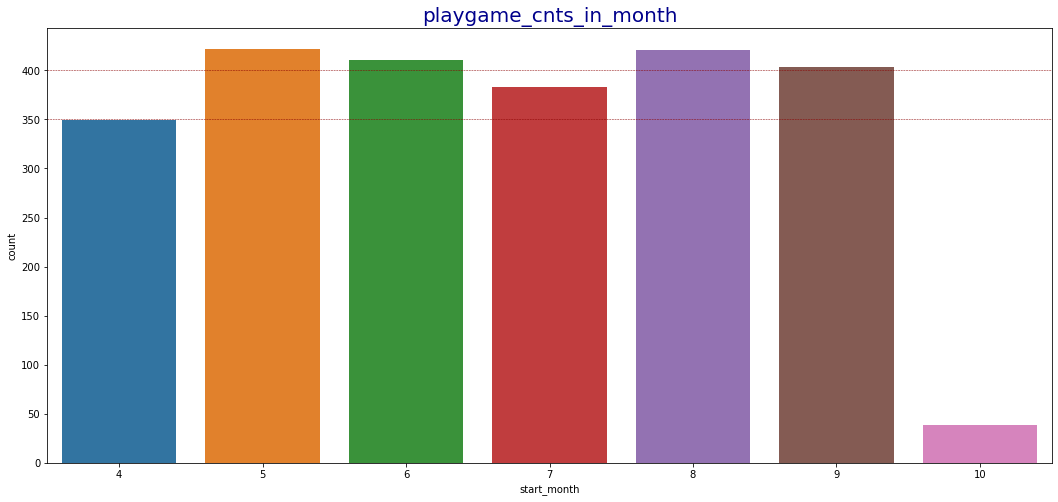

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8)) # 빈 캔버스(도화지)
# nrows = 행개수, ncols = 열개수, figsize = 전체 사이즈

# 게임이 각 월에 몇개씩 있는지?
sns.countplot( 
    data = df_game,
    x = 'start_month'
)

plt.title(f'playgame_cnts_in_month', fontsize = 20, color = 'darkblue') #타이틀이름 설정 (타이틀이름, 폰트사이즈, 컬러)


plt.axhline(350, color='darkred', linestyle='--', linewidth=0.5)
plt.axhline(400, color='darkred', linestyle='--', linewidth=0.5)
## y 축으로 수평선(줄 긋기) (기준, 컬러, 선 스타일, 선두께)
## y 멀어질수록 막대그래프 데이터 보기 어려움 -> 방안 : 데이터 라벨링, 줄 긋기

plt.show()

## 컬럼생성: 관중 점유율

In [30]:
# 관중 점유율 컬럼 생성
df_game['occupied_ratio'] = df_game['attendance']/df_game['capacity']
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.008570
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618
...,...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,3,0.379763
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,6,0.816786
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,5,0.844010
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,3,0.551677


## 관중 점유율 전처리 with 'np.where'

In [31]:
## 100%가 넘는 점유율 -> 100%로 처리해주기

df_game['occupied_ratio'] = np.where(
                                    df_game['occupied_ratio'] >= 1, ## 조건
                                    1,  ## 조건을 만족하면 반환시킬 값
                                    df_game['occupied_ratio']) ## 조건을 만족하지 않으면 반환하는 값

df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.000000
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618


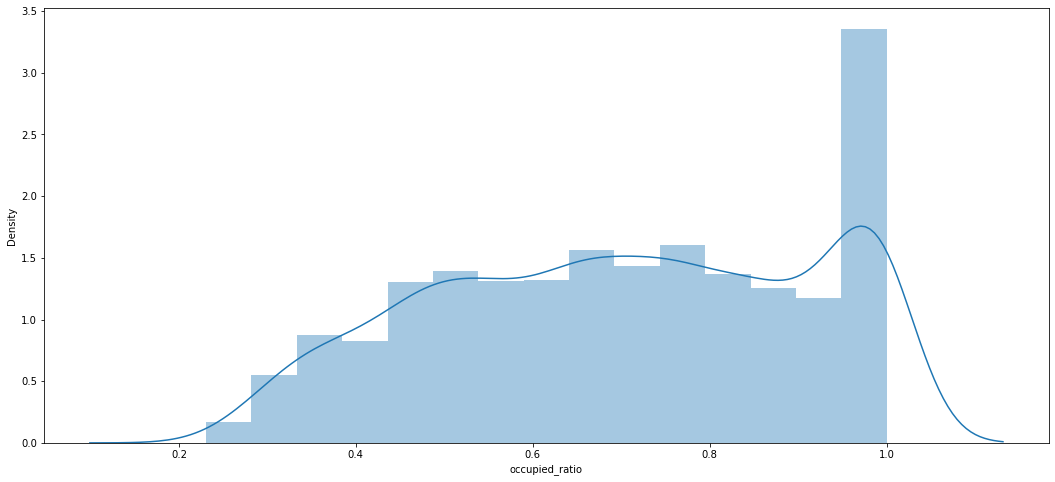

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(
    df_game['occupied_ratio'],
    #kde = False, # Ture : 선 표시
   # bins = 30, # 막대그래프 갯수
    hist = True # False : 히스토그램 표시 안함
)

plt.show()

## daily 관중 점유율 

In [33]:
# daily 관중 점유율을 계산하기 위한 임시 데이터 프레임 생성
temp_df = df_game.groupby(['start_date']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']
temp_df

,start_date,total_attendance,total_capacity,occupied_ratio
0,2016-04-03,70542,69404,1.016397
1,2016-04-04,330820,339137,0.975476
2,2016-04-05,325064,360664,0.901293
3,2016-04-06,363398,731600,0.496717
4,2016-04-07,194618,337747,0.576224
...,...,...,...,...
176,2016-09-28,441640,688907,0.641073
177,2016-09-29,420805,570339,0.737816
178,2016-09-30,303564,436423,0.695573
179,2016-10-01,634583,830802,0.763820


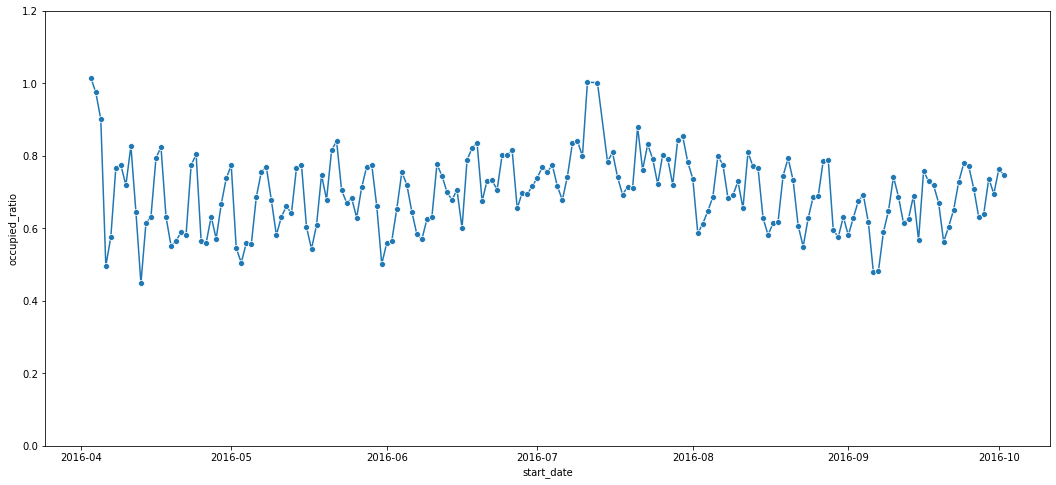

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_date',
    y = 'occupied_ratio',
    marker = 'o'
    
)

plt.ylim([0, 1.2]) 
# 모든 그래프에 축 범위 제한해두면, 각 그래프와의 직접적으로 비교할 수 있음
## 그래프 볼때 중요한 것 : 1) x,y 축 , 2) 최대값, 최소값이 똑같은 인터벌인지 보는편 !

plt.show()

## monthly 관중 점유율

In [56]:
#daily 관중 점유율을 계산하기 위한 임시 데이터 프레임 생성
temp_df = df_game.groupby(['start_month']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

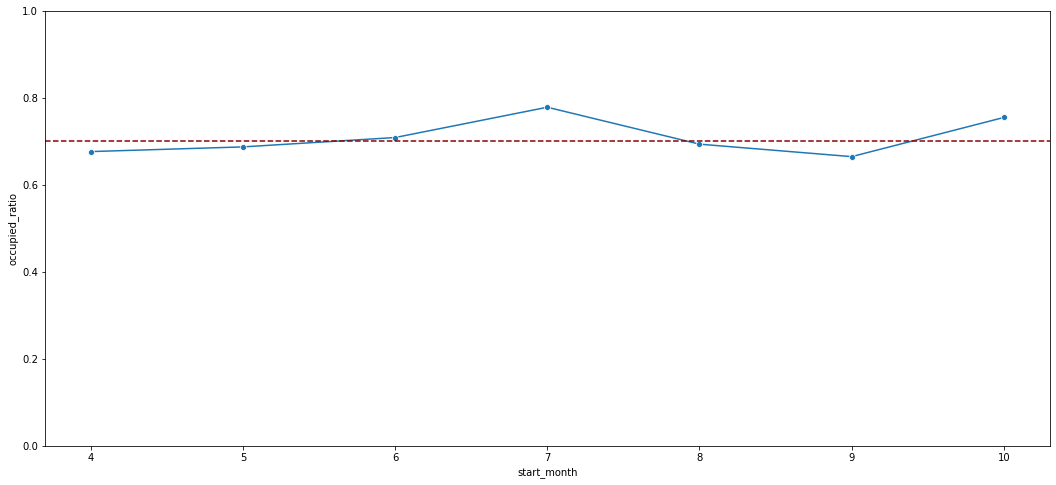

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_month',
    y = 'occupied_ratio',
    marker = 'o'
    )

plt.ylim([0, 1])
plt.axhline(0.7, color = 'darkred', linestyle ='--' )
plt.show()

In [61]:
# 요일 컬럼 생성: dayofweek 활용 → 각 요일을 숫자로 표현 해 준다.
df_game['dayofweek'] = df_game['start_date'].dt.dayofweek
#df_game['dayofweek'] = df_game['start_date'].dt.day_name() : 요일표시
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio,dayofweek
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444,2
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.000000,6
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604,6
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498,6
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618,5


In [62]:
# 해당 날짜가 어떠한 숫자로 요일이 표현되었는 지 확인하고(0~6 or 1~7)
# 구글링을 통해 주말이 어떤 숫자인지 파악하기 ( 5, 6 이 주말임)
sorted(df_game['dayofweek'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6]

In [63]:
# 주말 여부를 나타내는 구분자 컬럼 생성
df_game['is_weekend'] = np.where( # 엑셀에서의 if함수와 같은 역할: 단, 컬럼 단위
    df_game['dayofweek'] >= 5, # 조건
    1, # 주말, 조건이 참( True )일 경우에 반환( return )할 값
    0  # 주말 x, 조건이 거짓( False )일 경우에 반환( return )할 값
)
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio,dayofweek,is_weekend
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444,2,0
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.000000,6,1
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604,6,1
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498,6,1
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,3,0.379763,3,0
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,6,0.816786,6,1
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,5,0.844010,5,1
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,3,0.551677,3,0


[monthly 평일 or 주말 관중 점유율]

In [ ]:
# monthly 평일 or 주말 관중 점유율 계산하기 위한 임시 데이터 프레임 생성

In [65]:
temp_df = df_game.groupby(['start_month', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

temp_df.head()


,start_month,is_weekend,total_attendance,total_capacity,occupied_ratio
0,4,0,6007952,9676058,0.620909
1,4,1,4151539,5335990,0.778026
2,5,0,6947645,11071940,0.627500
3,5,1,5523516,7066775,0.781618
4,6,0,7630389,11432056,0.667456


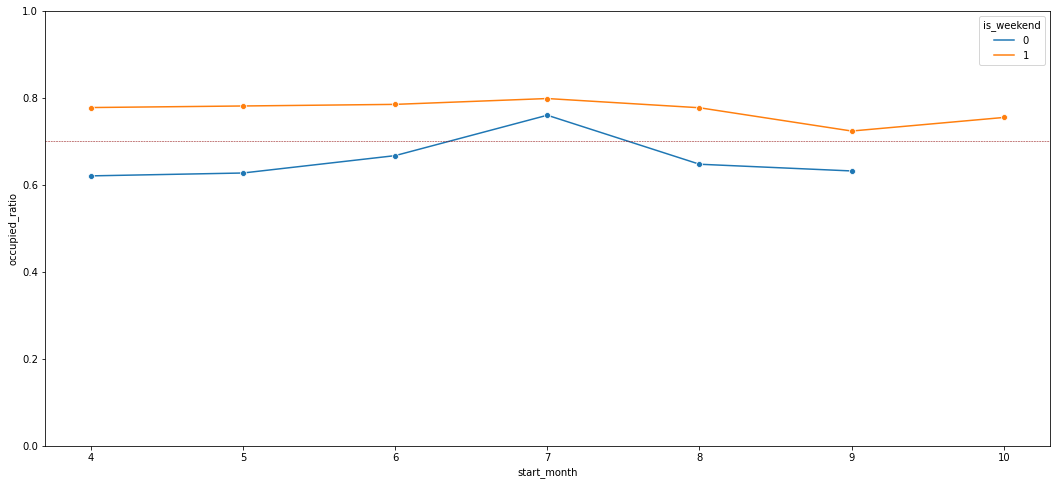

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_month',
    y = 'occupied_ratio',
    hue = 'is_weekend', # 파라미터
    marker = 'o'
)

plt.ylim([0,1])
plt.axhline(0.7, color = 'darkred', linestyle='--', linewidth=0.5)
plt.show()

In [69]:
# weekly 관중 점유율 추세 보기 위해, 해당 날짜가 몇주차인지( week_number ) 나타내는 컬럼 생성
df_game['week_number'] = df_game['start_date'].dt.week 
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio,dayofweek,is_weekend,week_number
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444,2,0,34
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.000000,6,1,24
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604,6,1,29
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498,6,1,30
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618,5,1,30


[weekly 관중 점유율]

In [ ]:
# weekly 관중 점유율 계산하기 위한 임시 데이터 프레임 생성

In [70]:
# weekly 관중 점유율

temp_df = df_game.groupby(['week_number', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']



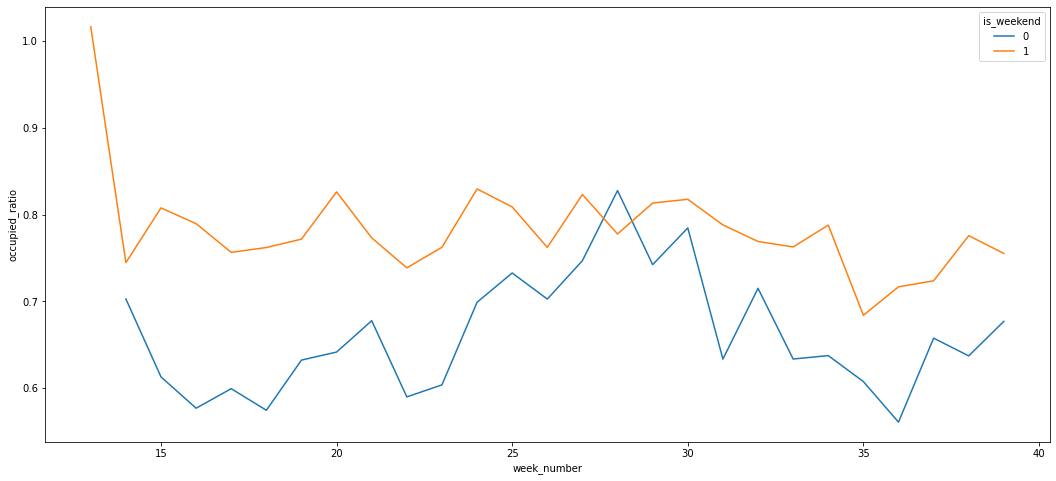

In [71]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'week_number',
    y = 'occupied_ratio',
    hue = 'is_weekend'
)

plt.show()

In [72]:
# ↑↑↑↑↑↑ 위 그래프는 X축이 1년 중 몇 번째 주에 해당하는 지( 대략 1주 ~ 52주 ) 나타내므로 X축이 익숙하지가 않다.
# 따라서, X축을 보다 친숙한 단위인 날짜로 설정하기 위해,
# 특정 주차( week_number )의 시작 날짜를 나타내는 컬럼을 생성해 주기
# 'start_date', 'week_number', week_start_date'의 컬럼을 비교 하고 생각 해 보기.
df_game['week_start_date'] = df_game.groupby(['week_number'])['start_date'].transform('min')
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,start_day,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,2,0.380444,2,0,34,2016-08-22
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,6,1.000000,6,1,24,2016-06-13
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,6,0.916604,6,1,29,2016-07-18
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,6,0.434498,6,1,30,2016-07-25
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,5,0.614618,5,1,30,2016-07-25


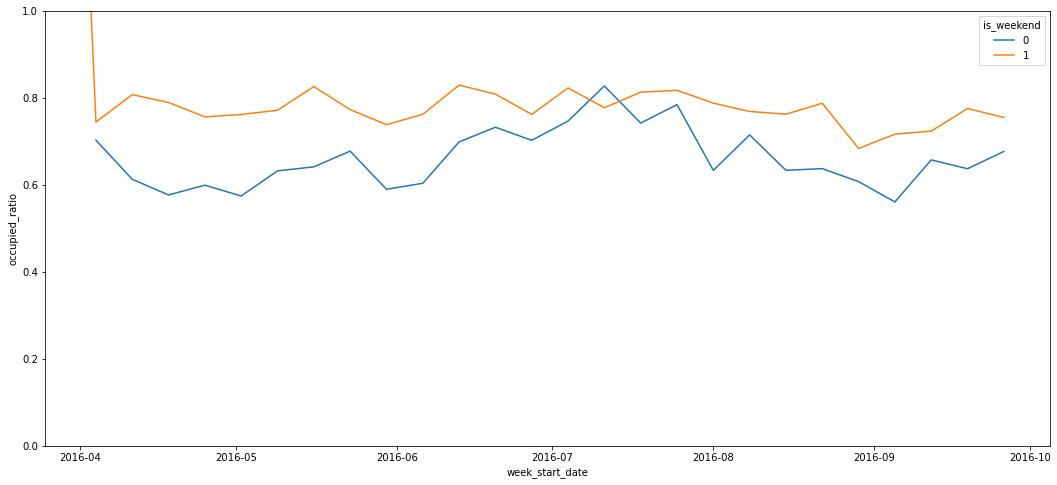

In [73]:
# weekly 관중 점유율 with week_start_date

temp_df = df_game.groupby(['week_start_date', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'week_start_date',
    y = 'occupied_ratio',
    hue = 'is_weekend'
)
plt.ylim([0, 1])
plt.show()

In [74]:
temp_df.head()

,week_start_date,is_weekend,total_attendance,total_capacity,occupied_ratio
0,2016-04-03,1,70542,69404,1.016397
1,2016-04-04,0,1562365,2222805,0.702880
2,2016-04-04,1,1057421,1419930,0.744699
3,2016-04-11,0,1506239,2457057,0.613026
4,2016-04-11,1,1140000,1411290,0.807772


In [75]:
# 7월달 중 평일 점유율이 높은 곳 찾아내기 
temp_df[temp_df.week_start_date.dt.month == 7]
#temp_df[temp_df['week_start_date'].dt.month == 7]

,week_start_date,is_weekend,total_attendance,total_capacity,occupied_ratio
27,2016-07-04,0,2008218,2688361,0.747005
28,2016-07-04,1,1325595,1610356,0.823169
29,2016-07-11,0,351475,424628,0.827725
30,2016-07-11,1,1194901,1536421,0.777717
31,2016-07-18,0,1886223,2540722,0.742396
32,2016-07-18,1,1236615,1520318,0.813392
33,2016-07-25,0,1955301,2491816,0.784689
34,2016-07-25,1,1271519,1555088,0.817651


### 컬럼생성: 경기시간

In [ ]:
# 경기 시간을 전처리 해 주기: HH:MM 형태로 표기되어 있는 값을, 연산할 수 있도록 분 단위로 통일시켜주기
df_game[['hours', 'minutes']] = df_game['duration'].str.split(':', n = 1, expand = True)
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date,hours,minutes
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34,2016-08-22,2,44
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24,2016-06-13,3,00
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29,2016-07-18,3,02
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30,2016-07-25,2,43
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30,2016-07-25,3,42


In [ ]:
# 생성된 컬럼들의 데이터 타입 확인
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   game_id          2428 non-null   object        
 1   start_at         2428 non-null   object        
 2   attendance       2428 non-null   int64         
 3   capacity         2428 non-null   int64         
 4   ground_name      2428 non-null   object        
 5   duration         2428 non-null   object        
 6   inning           2428 non-null   int64         
 7   home_team        2428 non-null   object        
 8   start_date       2428 non-null   datetime64[ns]
 9   start_month      2428 non-null   int64         
 10  occupied_ratio   2428 non-null   float64       
 11  dayofweek        2428 non-null   int64         
 12  is_weekend       2428 non-null   int64         
 13  week_number      2428 non-null   int64         
 14  week_start_date  2428 non-null   datetim

In [ ]:
# 연산할 수 있도록 문자열 데이터를 숫자형 데이터로 바꿔주기
df_game['hours'] = df_game['hours'].astype('int')
df_game['minutes'] = df_game['minutes'].astype('int')

# 숫자형으로 바뀐 데이터를 연산하여 분 단위로 경기 시간을 통일시켜주기
df_game['duration_in_minute'] = df_game['hours']*60 + df_game['minutes']
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date,hours,minutes,duration_in_minute
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34,2016-08-22,2,44,164
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24,2016-06-13,3,0,180
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29,2016-07-18,3,2,182
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30,2016-07-25,2,43,163
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30,2016-07-25,3,42,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,0.379763,3,0,33,2016-08-15,2,53,173
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,0.816786,6,1,17,2016-04-25,3,6,186
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,0.844010,5,1,38,2016-09-19,2,48,168
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,0.551677,3,0,23,2016-06-06,3,5,185


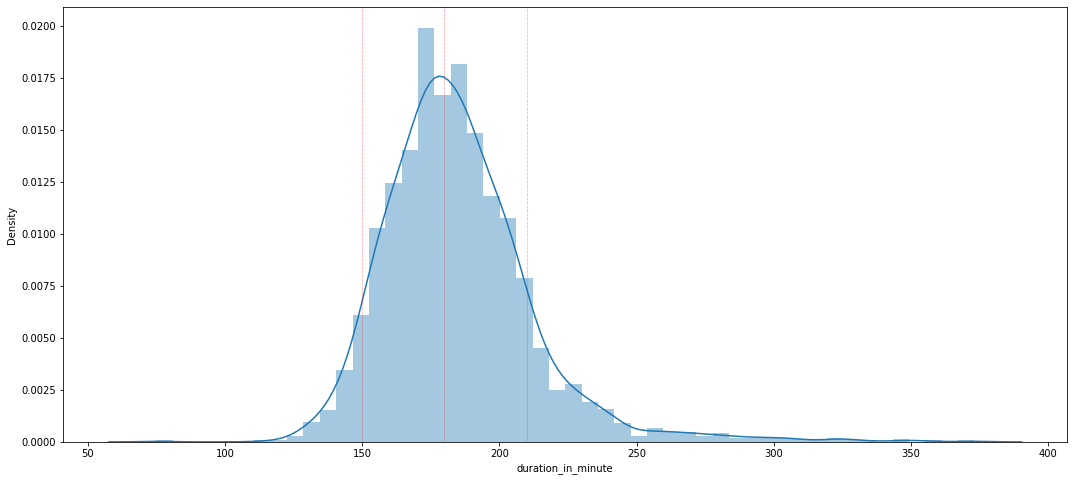

CPU times: user 481 ms, sys: 137 ms, total: 618 ms
Wall time: 493 ms


In [ ]:
%%time

# 경기시간 분포 그려보기

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (18, 8))

sns.distplot(df_game['duration_in_minute'])

plt.axvline(150, color = 'red', linestyle = ':', linewidth = 0.5)
plt.axvline(180, color = 'red', linestyle = ':', linewidth = 0.5)
plt.axvline(210, color = 'red', linestyle = ':', linewidth = 0.5)

plt.show()

In [ ]:
# 각 경기장 별로, 평균 경기시간이 얼마나 다른 지 확인 해 보기
# 투수에게 유리한 경기장과, 타자에게 유리한 경기장이 경기 시간으로 잘 나타나는 지 확인 해 볼 수 있다.
# e.g., 투수에게 유리한 경기장은 경기 시간이 짧고, 타자에게 유리한 경기장은 경기시간이 길 것으로 예상할 수 있음


temp_df = df_game.groupby(['ground_name']).agg(
    total_duration_time = ('duration_in_minute', 'sum'),
    game_cnts = ('game_id', 'nunique'),
).reset_index()

temp_df['avg_game_duration'] = temp_df['total_duration_time']/temp_df['game_cnts']
temp_df.sort_values(by = 'avg_game_duration', ascending = False)

,ground_name,total_duration_time,game_cnts,avg_game_duration
3,Chase Field,15966,81,197.111111
9,Fenway Park,15877,81,196.012346
7,Coors Field,15684,81,193.629630
27,Turner Field,15388,80,192.350000
20,PETCO Park,15292,81,188.790123
4,Citi Field,15272,81,188.543210
21,PNC Park,15241,81,188.160494
15,Miller Park,15221,81,187.913580
17,Nationals Park,15217,81,187.864198
0,AT&T Park,15190,81,187.530864


## 1-2. 야구선수
    연봉 정보가 있었다면 더 재미있는 EDA 가 되었을 것으로 예상..


In [ ]:
# 야구 선수에 관한 컬럼들을 df_base에서 적당히 가져오기
df_player = df_base[['game_id',
    'venue_name',
    'venue_surface',
    'inning_number',
    'inning_half',
    'pitch_speed',
    'outcome_description',
    'hitter_id',
    'hitter_weight',
    'hitter_height',
    'hitter_bat_hand',
    'pitcher_id',
    'pitcher_throw_hand',
    'pitch_type',
    'pitch_type_description',
    'is_hit',]]

df_player

,game_id,venue_name,venue_surface,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_hit
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,3,BOT,93,Strike Looking,9880d4de-4cd4-47a5-8996-61d52a35ea2a,190,73,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,6,BOT,91,Foul Ball,ff750663-5eb3-4006-9d6a-2660397ff595,235,75,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,TOP,89,Strike Looking,39212be3-ce0d-4f7f-ab1a-c687ca189edd,195,73,L,30d360f6-588a-4e82-aa4a-f8cd6d1f9b93,L,SL,Slider,0
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,BOT,94,Ground Out,d89e0030-393c-4433-9779-25aed817abb5,170,69,L,aacf4eee-3371-4ec4-870a-9012fd69e629,R,FA,Fastball,0


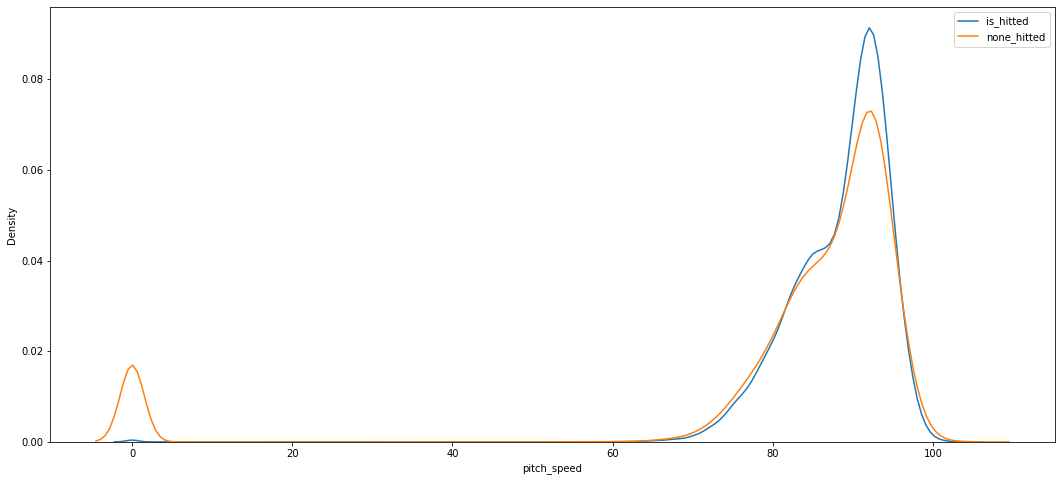

CPU times: user 4.37 s, sys: 285 ms, total: 4.65 s
Wall time: 4.43 s


In [ ]:
%%time

# 안타가 생성된 경우와 그렇지 않은 경우의 투구 속도 분포

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(df_player[df_player.is_hit == 1]['pitch_speed'], hist = False, label = 'is_hitted')
sns.distplot(df_player[df_player.is_hit == 0]['pitch_speed'], hist = False, label = 'none_hitted')

plt.legend()
plt.show()

In [ ]:
# 미국 기록이므로 단위 문화가 다르다
# mile → km // pound → kg // inch → cm 로 변경( 구글링으로 변환 기준 검색 )

df_player['pitch_speed_km'] = df_player['pitch_speed']*1.609344 # mile → km
df_player['hitter_weight_kg'] = df_player['hitter_weight']*0.453592 # pound → km
df_player['hitter_height_cm'] = df_player['hitter_height']*2.54 # inch → km
df_player

,game_id,venue_name,venue_surface,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_hit,pitch_speed_km,hitter_weight_kg,hitter_height_cm
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0,131.966208,115.66596,187.96
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1,131.966208,115.66596,187.96
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,146.450304,86.18248,177.80
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,146.450304,90.71840,182.88
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0,144.840960,90.71840,182.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,3,BOT,93,Strike Looking,9880d4de-4cd4-47a5-8996-61d52a35ea2a,190,73,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0,149.668992,86.18248,185.42
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,6,BOT,91,Foul Ball,ff750663-5eb3-4006-9d6a-2660397ff595,235,75,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0,146.450304,106.59412,190.50
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,TOP,89,Strike Looking,39212be3-ce0d-4f7f-ab1a-c687ca189edd,195,73,L,30d360f6-588a-4e82-aa4a-f8cd6d1f9b93,L,SL,Slider,0,143.231616,88.45044,185.42
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,BOT,94,Ground Out,d89e0030-393c-4433-9779-25aed817abb5,170,69,L,aacf4eee-3371-4ec4-870a-9012fd69e629,R,FA,Fastball,0,151.278336,77.11064,175.26


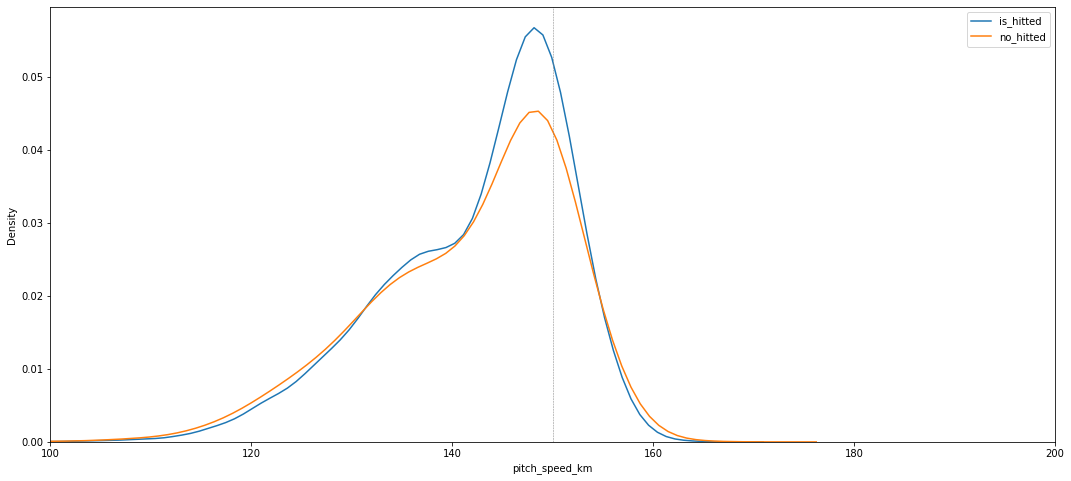

CPU times: user 4.51 s, sys: 349 ms, total: 4.86 s
Wall time: 4.51 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(df_player[df_player.is_hit == 1]['pitch_speed_km'], label = 'is_hitted', hist = False)
sns.distplot(df_player[df_player.is_hit == 0]['pitch_speed_km'], label = 'no_hitted', hist = False)

plt.legend()
plt.xlim([100, 200])
plt.axvline(150, color = 'gray', linewidth = 0.5, linestyle = '--')
plt.show()

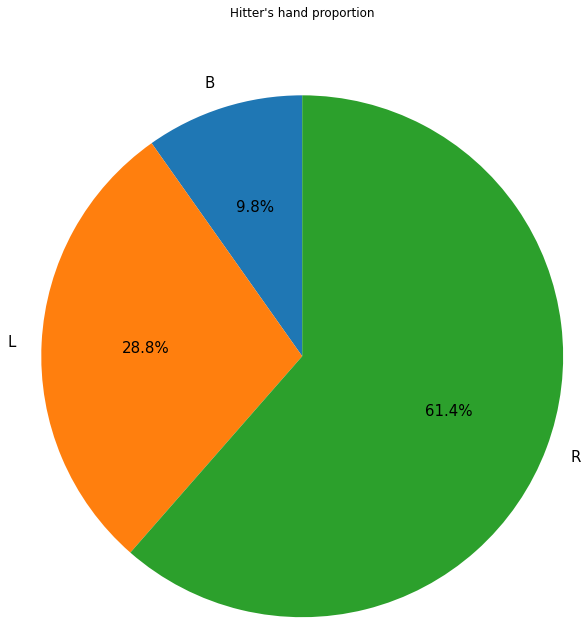

In [ ]:
# 왼손타자 및 오른손 타자의 분포 확인
temp_df = df_player.groupby(['hitter_bat_hand']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()
# temp_df
fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.hitter_bat_hand,
    startangle = 90,
    radius = 3, 
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Hitter\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

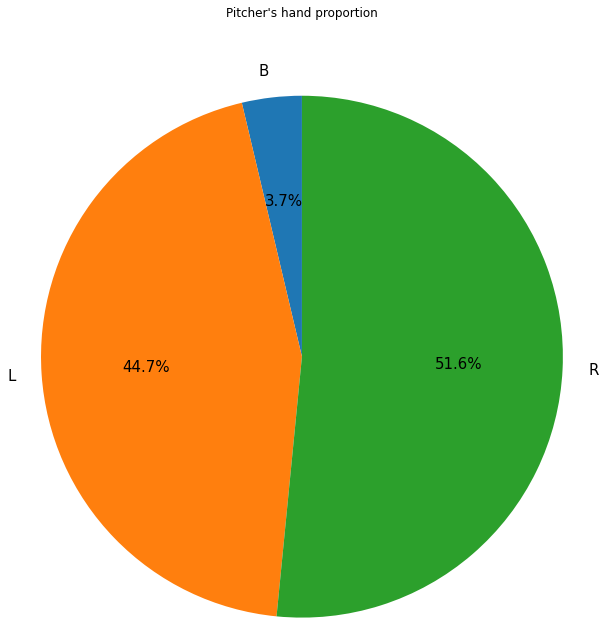

In [ ]:
# 왼손투수 및 오른손 투수의 분포 확인
temp_df = df_player.groupby(['pitcher_throw_hand']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()

fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.pitcher_throw_hand,
    startangle = 90,
    radius = 3,
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Pitcher\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

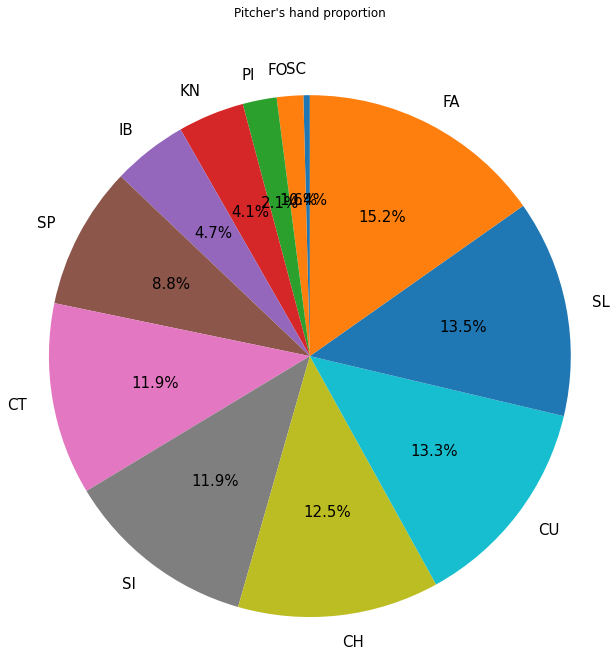

In [ ]:
# 투수가 던진 구종 분포 확인

temp_df = df_player.groupby(['pitch_type']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()
temp_df = temp_df.sort_values(by = 'player_ratio', ascending = True, ignore_index = True)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.pitch_type,
    startangle = 90,
    radius = 3,
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Pitcher\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()